In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.groupby(["Pclass"], as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df.groupby(["Sex"], as_index=False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df.groupby(["SibSp"], as_index=False)["Survived"].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df.groupby(["Parch"], as_index=False)["Survived"].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [10]:
train_df["FamilySize"] = train_df["SibSp"]+train_df["Parch"]+1
test_df["FamilySize"] = train_df["SibSp"]+train_df["Parch"]+1

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
train_df.groupby(["FamilySize"], as_index=False)["Survived"].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [13]:
family_map = {1: "Alone", 
              2: "Small",
             3: "Small",
             4: "Small",
             5: "Medium",
             6: "Medium",
             7: "Large",
             8: "Large",
             11: "Large"}
train_df["FamilySizeGrouped"] = train_df["FamilySize"].map(family_map)
test_df["FamilySizeGrouped"] = train_df["FamilySize"].map(family_map)

In [14]:
train_df.groupby(["FamilySizeGrouped"], as_index=False)["Survived"].mean()

,FamilySizeGrouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [15]:
train_df.groupby(["Embarked"], as_index=False)["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


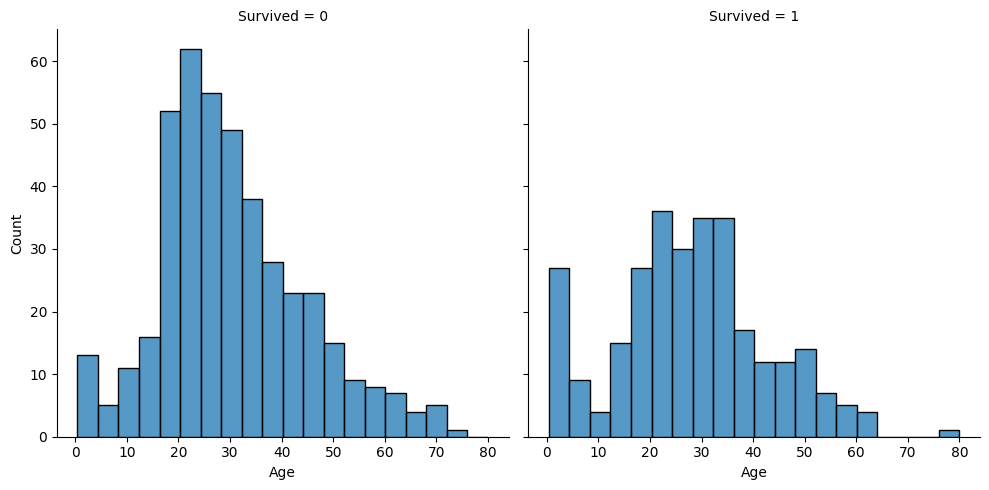

In [16]:
sns.displot(train_df, x="Age", col="Survived")

In [17]:
train_df["AgeCut"] = pd.qcut(train_df["Age"], 8)
test_df["AgeCut"] = pd.qcut(train_df["Age"], 8)

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGrouped,AgeCut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


In [19]:
train_df.groupby(["AgeCut"], as_index=False)["Survived"].mean()

<ipython-input-19-55c75097dd84>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["AgeCut"], as_index=False)["Survived"].mean()


,AgeCut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [20]:
train_df.loc[train_df["Age"] <= 16, "Age"] = 0
train_df.loc[(train_df["Age"] > 16)&(train_df["Age"] <= 21), "Age"] = 1
train_df.loc[(train_df["Age"] > 21)&(train_df["Age"] <= 24), "Age"] = 2
train_df.loc[(train_df["Age"] > 24)&(train_df["Age"] <= 28), "Age"] = 3
train_df.loc[(train_df["Age"] > 28)&(train_df["Age"] <= 32), "Age"] = 4
train_df.loc[(train_df["Age"] > 32)&(train_df["Age"] <= 38), "Age"] = 5
train_df.loc[(train_df["Age"] > 38)&(train_df["Age"] <= 47), "Age"] = 6
train_df.loc[(train_df["Age"] > 47)&(train_df["Age"] <= 80), "Age"] = 7
train_df.loc[(train_df["Age"] > 80), "Age"] = 8

test_df.loc[test_df["Age"] <= 16, "Age"] = 0
test_df.loc[(test_df["Age"] > 16)&(test_df["Age"] <= 21), "Age"] = 1
test_df.loc[(test_df["Age"] > 21)&(test_df["Age"] <= 24), "Age"] = 2
test_df.loc[(test_df["Age"] > 24)&(test_df["Age"] <= 28), "Age"] = 3
test_df.loc[(test_df["Age"] > 28)&(test_df["Age"] <= 32), "Age"] = 4
test_df.loc[(test_df["Age"] > 32)&(test_df["Age"] <= 38), "Age"] = 5
test_df.loc[(test_df["Age"] > 38)&(test_df["Age"] <= 47), "Age"] = 6
test_df.loc[(test_df["Age"] > 47)&(test_df["Age"] <= 80), "Age"] = 7
test_df.loc[(test_df["Age"] > 80), "Age"] = 8

In [21]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGrouped,AgeCut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


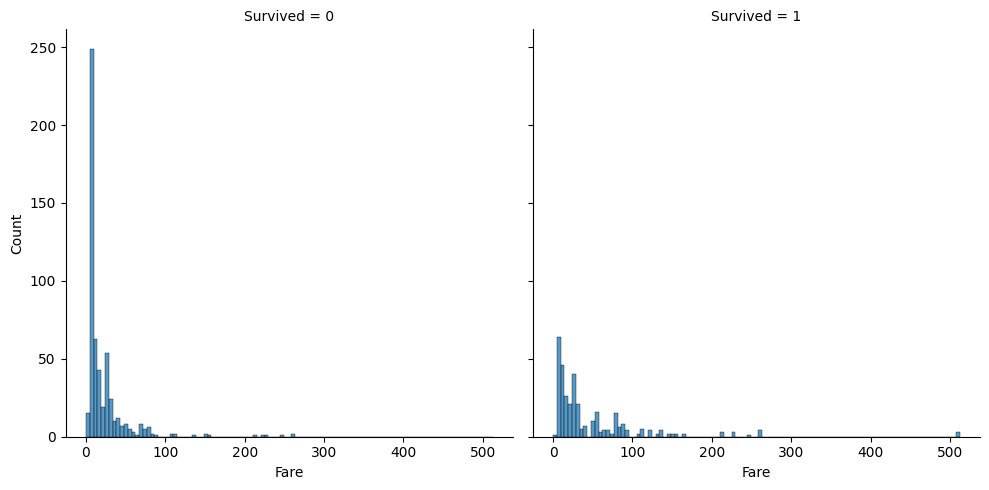

In [22]:
sns.displot(train_df, x="Fare", col="Survived")

In [23]:
train_df["FareCut"] = pd.qcut(train_df["Fare"], 8)
test_df["FareCut"] = pd.qcut(train_df["Fare"], 8)

In [24]:
train_df.groupby(["FareCut"], as_index=False)["Survived"].mean()

<ipython-input-24-4498cd9aa9ab>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["FareCut"], as_index=False)["Survived"].mean()


,FareCut,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


In [25]:
train_df.loc[train_df["Fare"] <= 7.7, "Fare"] = 0
train_df.loc[(train_df["Fare"] > 7.7)&(train_df["Fare"] <= 7.9), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 7.9)&(train_df["Fare"] <= 9.8), "Fare"] = 2
train_df.loc[(train_df["Fare"] > 9.8)&(train_df["Fare"] <= 14.4), "Fare"] = 3
train_df.loc[(train_df["Fare"] > 14.4)&(train_df["Fare"] <= 24.4), "Fare"] = 4
train_df.loc[(train_df["Fare"] > 24.4)&(train_df["Fare"] <= 31), "Fare"] = 5
train_df.loc[(train_df["Fare"] > 31)&(train_df["Fare"] <= 69.4), "Fare"] = 6
train_df.loc[(train_df["Fare"] > 69.4), "Fare"] = 7

test_df.loc[test_df["Fare"] <= 7.7, "Fare"] = 0
test_df.loc[(test_df["Fare"] > 7.7)&(test_df["Fare"] <= 7.9), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 7.9)&(test_df["Fare"] <= 9.8), "Fare"] = 2
test_df.loc[(test_df["Fare"] > 9.8)&(test_df["Fare"] <= 14.4), "Fare"] = 3
test_df.loc[(test_df["Fare"] > 14.4)&(test_df["Fare"] <= 24.4), "Fare"] = 4
test_df.loc[(test_df["Fare"] > 24.4)&(test_df["Fare"] <= 31), "Fare"] = 5
test_df.loc[(test_df["Fare"] > 31)&(test_df["Fare"] <= 69.4), "Fare"] = 6
test_df.loc[(test_df["Fare"] > 69.4), "Fare"] = 7

In [26]:
train_df["Title"] = train_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())
test_df["Title"] = test_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())

In [27]:
train_df.groupby(["Title"], as_index=False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [28]:
train_df["Title"] = train_df["Title"].replace({
    "Capt" : "Mil",
    "Col" : "Mil",
    "Major" : "Mil",
    "Jonkheer" : "Nob",
    "Lady" : "Nob",
    "the Countess" : "Nob",
    "Don" : "Nob",
    "Sir" : "Nob",
    "Mlle" : "Nob",
    "Ms" : "Nob",
    "Mme" : "Nob"
})

test_df["Title"] = test_df["Title"].replace({
    "Capt" : "Mil",
    "Col" : "Mil",
    "Major" : "Mil",
    "Jonkheer" : "Nob",
    "Lady" : "Nob",
    "the Countess" : "Nob",
    "Don" : "Nob",
    "Sir" : "Nob",
    "Mlle" : "Nob",
    "Ms" : "Nob",
    "Mme" : "Nob"
})

In [29]:
train_df.groupby(["Title"], as_index=False)["Survived"].agg(["count", "mean"])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Mil,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Nob,9,0.777778
7,Rev,6,0.000000


In [30]:
train_df["NameLength"] = train_df["Name"].apply(lambda x: len(x))
test_df["NameLength"] = test_df["Name"].apply(lambda x: len(x))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


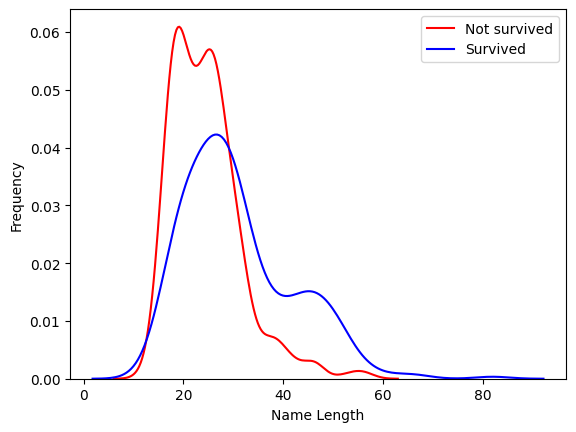

In [31]:
g = sns.kdeplot(train_df["NameLength"][(train_df["Survived"]==0) & (train_df["NameLength"].notnull())], color="Red")
g = sns.kdeplot(train_df["NameLength"][(train_df["Survived"]==1) & (train_df["NameLength"].notnull())], ax=g, color="Blue")
g.set_xlabel("Name Length")
g.set_ylabel("Frequency")
g = g.legend(["Not survived","Survived"])

In [32]:
#train_df["NameLength"] = pd.qcut(train_df["NameLength"], 8)
#test_df["NameLength"] = pd.qcut(test_df["NameLength"], 8)

In [33]:
#train_df.groupby(["NameLength"], as_index=False)["Survived"].mean()

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                714 non-null    float64 
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Cabin              204 non-null    object  
 11  Embarked           889 non-null    object  
 12  FamilySize         891 non-null    int64   
 13  FamilySizeGrouped  891 non-null    object  
 14  AgeCut             714 non-null    category
 15  FareCut            891 non-null    category
 16  Title   

In [35]:
train_df.loc[train_df["NameLength"] <= 18, "NameLength"] = 0
train_df.loc[(train_df["NameLength"] > 18)&(train_df["NameLength"] <= 20), "NameLength"] = 1
train_df.loc[(train_df["NameLength"] > 20)&(train_df["NameLength"] <= 23), "NameLength"] = 2
train_df.loc[(train_df["NameLength"] > 23)&(train_df["NameLength"] <= 25), "NameLength"] = 3
train_df.loc[(train_df["NameLength"] > 25)&(train_df["NameLength"] <= 27), "NameLength"] = 4
train_df.loc[(train_df["NameLength"] > 27)&(train_df["NameLength"] <= 30), "NameLength"] = 5
train_df.loc[(train_df["NameLength"] > 30)&(train_df["NameLength"] <= 38), "NameLength"] = 6
train_df.loc[(train_df["NameLength"] > 38), "NameLength"] = 7

test_df.loc[test_df["NameLength"] <= 18, "NameLength"] = 0
test_df.loc[(test_df["NameLength"] > 18)&(test_df["NameLength"] <= 20), "NameLength"] = 1
test_df.loc[(test_df["NameLength"] > 20)&(test_df["NameLength"] <= 23), "NameLength"] = 2
test_df.loc[(test_df["NameLength"] > 23)&(test_df["NameLength"] <= 25), "NameLength"] = 3
test_df.loc[(test_df["NameLength"] > 25)&(test_df["NameLength"] <= 27), "NameLength"] = 4
test_df.loc[(test_df["NameLength"] > 27)&(test_df["NameLength"] <= 30), "NameLength"] = 5
test_df.loc[(test_df["NameLength"] > 30)&(test_df["NameLength"] <= 38), "NameLength"] = 6
test_df.loc[(test_df["NameLength"] > 38), "NameLength"] = 7

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGrouped,AgeCut,FareCut,Title,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.75]",Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,7.0,C85,C,2,Small,"(32.312, 38.0]","(69.488, 512.329]",Mrs,7
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,2.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.91, 9.841]",Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,6.0,C123,S,2,Small,"(32.312, 38.0]","(31.0, 69.488]",Mrs,7
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,2.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.91, 9.841]",Mr,3


In [37]:
train_df["TicketNumber"] = train_df["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))
test_df["TicketNumber"] = test_df["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))

In [38]:
train_df.groupby(["TicketNumber"], as_index=False)["Survived"].agg(["count", "mean"]).sort_values("count", ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [39]:
train_df.groupby("TicketNumber")["TicketNumber"].transform("count")

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [40]:
train_df["TicketNumberCounts"] = train_df.groupby("TicketNumber")["TicketNumber"].transform("count")
test_df["TicketNumberCounts"] = test_df.groupby("TicketNumber")["TicketNumber"].transform("count")

In [41]:
train_df.groupby(["TicketNumberCounts"], as_index=False)["Survived"].agg(["count", "mean"]).sort_values("count", ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [42]:
train_df["Ticket"].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [43]:
train_df["TicketLocation"] = np.where(train_df["Ticket"].str.split(pat=" ", expand=True)[1].notna(), train_df["Ticket"].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), "Blank")
test_df["TicketLocation"] = np.where(test_df["Ticket"].str.split(pat=" ", expand=True)[1].notna(), test_df["Ticket"].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), "Blank")

In [44]:
train_df["TicketLocation"].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [45]:
train_df["TicketLocation"] = train_df["TicketLocation"].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C', 
})

test_df["TicketLocation"] = test_df["TicketLocation"].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C', 
})

In [46]:
train_df.groupby(["TicketLocation"], as_index=False)["Survived"].agg(["count", "mean"])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [47]:
train_df["Cabin"] = train_df["Cabin"].fillna("u")
train_df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else "x" for i in train_df["Cabin"]])

test_df["Cabin"] = test_df["Cabin"].fillna("u")
test_df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else "x" for i in test_df["Cabin"]])

In [48]:
train_df.groupby(["Cabin"], as_index=False)["Survived"].agg(["count", "mean"])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,u,687,0.299854


In [49]:
train_df["CabinAssigned"] = train_df["Cabin"].apply(lambda x: 0 if x in ["u"] else 1)
test_df["CabinAssigned"] = test_df["Cabin"].apply(lambda x: 0 if x in ["u"] else 1)

In [50]:
train_df.groupby(["CabinAssigned"], as_index=False)["Survived"].agg(["count", "mean"])

,CabinAssigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,FamilySizeGrouped,AgeCut,FareCut,Title,NameLength,TicketNumber,TicketNumberCounts,TicketLocation,CabinAssigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,2,Small,"(20.125, 24.0]","(-0.001, 7.75]",Mr,2,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,7.0,...,2,Small,"(32.312, 38.0]","(69.488, 512.329]",Mrs,7,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,2.0,...,1,Alone,"(24.0, 28.0]","(7.91, 9.841]",Miss,2,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,6.0,...,2,Small,"(32.312, 38.0]","(31.0, 69.488]",Mrs,7,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,2.0,...,1,Alone,"(32.312, 38.0]","(7.91, 9.841]",Mr,3,373450,1,Blank,0


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  FamilySize          891 non-null    int64   
 13  FamilySizeGrouped   891 non-null    object  
 14  AgeCut              714 non-null    category
 15  FareCut             891 non-null    cate

In [53]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FamilySizeGrouped', 'AgeCut', 'FareCut', 'Title', 'NameLength',
       'TicketNumber', 'TicketNumberCounts', 'TicketLocation',
       'CabinAssigned'],
      dtype='object')

In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 332 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  FamilySize          418 non-null    int64   
 12  FamilySizeGrouped   418 non-null    object  
 13  AgeCut              335 non-null    category
 14  FareCut             418 non-null    category
 15  Title               418 non-null    obje

In [55]:
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].mean(), inplace=True)

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 418 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                418 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  FamilySize          418 non-null    int64   
 12  FamilySizeGrouped   418 non-null    object  
 13  AgeCut              335 non-null    category
 14  FareCut             418 non-null    category
 15  Title               418 non-null    obje

In [57]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()
SI = SimpleImputer(strategy="most_frequent")

In [58]:
ode_cols = ["FamilySizeGrouped"]
ohe_cols = ["Sex", "Embarked"]

In [59]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]
X_test = test_df.drop(["AgeCut", "FareCut"], axis=1)


In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

In [61]:
ordinal_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [62]:
col_trans = ColumnTransformer(transformers=[
    ("impute", SI, ["Age"]),
    ("ord_pipeline", ordinal_pipeline, ode_cols),
    ("ohe_pipeline", ohe_pipeline, ohe_cols),
    ("passthrough", "passthrough", ["Pclass", "TicketNumberCounts", "CabinAssigned", "NameLength", "Age", "Fare"])
    ], 
    remainder="drop",
    n_jobs=1)

In [63]:
rfc = RandomForestClassifier()

In [64]:
param_grid={
    "n_estimators":[100, 150, 200],
    "min_samples_split" : [5, 10, 15],
    "max_depth" : [8, 9, 10, 15, 20],
    "min_samples_leaf":[1, 2, 4],
    "criterion" : ["gini", "entropy"]
}

In [65]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [66]:
pipelineFinalRfc = make_pipeline(col_trans, CV_rfc)
pipelineFinalRfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamilySizeGrouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                   'TicketNumberCounts',
                                                   'CabinAssigned',
                                                   'NameLength', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [67]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}
0.8286614793657048


In [68]:
dtc = DecisionTreeClassifier()

In [69]:
param_grid={
    "min_samples_split" : [5, 10, 15],
    "max_depth" : [8, 9, 10, 15, 20],
    "min_samples_leaf":[1, 2, 4],
    "criterion" : ["gini", "entropy"]
}

In [70]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [71]:
pipelineFinalDtc = make_pipeline(col_trans, CV_dtc)
pipelineFinalDtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamilySizeGrouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'CabinAssigned',
                                                   'NameLength', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [72]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8187727765192554


In [73]:
knn = KNeighborsClassifier()

In [74]:
param_grid={
    "n_neighbors" : [3, 5, 7, 9, 11],
    "weights" : ["uniform", "distance"],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
    "p" : [1,2]
}

In [75]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [76]:
pipelineFinalKnn = make_pipeline(col_trans, CV_knn)
pipelineFinalKnn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamilySizeGrouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'CabinAssigned',
                                                   'NameLength', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [77]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.8020092583472864


In [78]:
svc = SVC()

In [79]:
param_grid={
    "C": [100, 10, 1.0, 0.1, 0.001],
    "kernel": ["linear", "poly", "rbf", "signoid"]    
}

In [80]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [81]:
pipelineFinalSvc = make_pipeline(col_trans, CV_svc)
pipelineFinalSvc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamilySizeGrouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'CabinAssigned',
                                                   'NameLength', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'signoid']}))])

In [82]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8272628779671033


In [83]:
lr = LogisticRegression()

In [84]:
param_grid={
    "C": [100, 10, 1.0, 0.1, 0.001]
}

In [85]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [86]:
pipelineFinalLr = make_pipeline(col_trans, CV_lr)
pipelineFinalLr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamilySizeGrouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'CabinAssigned',
                                                   'NameLength', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001]}))])

In [87]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8033980104402639


In [88]:
gnb = GaussianNB()

In [89]:
param_grid={
    "var_smoothing": [0.0000001, 0.00000001, 0.000000001]
}

In [90]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [91]:
pipelineFinalGnb = make_pipeline(col_trans, CV_gnb)
pipelineFinalGnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamilySizeGrouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(step...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'CabinAssigned',
                                                   'NameLength', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-07, 1e-08,
                                                            1e-09]}))])

In [92]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-07}
0.7781345415148232


In [94]:
Y_predRfc = pipelineFinalRfc.predict(X_test)
Y_predDtc = pipelineFinalDtc.predict(X_test)
Y_predKnn = pipelineFinalKnn.predict(X_test)
Y_predSvc = pipelineFinalSvc.predict(X_test)
Y_predLr = pipelineFinalLr.predict(X_test)
Y_predGnb = pipelineFinalGnb.predict(X_test)

In [95]:
submissionRfc = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_predRfc
})

submissionDtc = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_predDtc
})

submissionKnn = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_predKnn
})

submissionSvc = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_predSvc
})

submissionLr = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_predLr
})

submissionGnb = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_predGnb
})

In [96]:
submissionRfc.to_csv("/kaggle/working/submissionRfc.csv", index=False)
submissionDtc.to_csv("/kaggle/working/submissionDtc.csv", index=False)
submissionKnn.to_csv("/kaggle/working/submissionKnn.csv", index=False)
submissionSvc.to_csv("/kaggle/working/submissionSvc.csv", index=False)
submissionLr.to_csv("/kaggle/working/submissionLr.csv", index=False)
submissionGnb.to_csv("/kaggle/working/submissionGnb.csv", index=False)